In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive"))

['Colab Notebooks', 'ma']


In [ ]:
path = "/content/drive/MyDrive/ma"
print(os.listdir(path))


['aaaaaaaaaaaaaaaaa']


In [ ]:
DATA_DIR = "/content/drive/MyDrive/ma/aaaaaaaaaaaaaaaaa"
print(os.listdir(DATA_DIR))


['chest-xray']


In [ ]:
dataset_path = "/content/drive/MyDrive/ma/aaaaaaaaaaaaaaaaa/chest-xray"


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/ma/aaaaaaaaaaaaaaaaa/chest-xray"

train_path = os.path.join(dataset_path, "train")
val_path   = os.path.join(dataset_path, "val")
test_path  = os.path.join(dataset_path, "test")

print("Train:", os.listdir(train_path))
print("Val:", os.listdir(val_path))
print("Test:", os.listdir(test_path))


Train: ['Covid-19', 'Emphysema', 'Normal', 'Tuberculosis', 'Pneumonia-Bacterial', 'Pneumonia-Viral']
Val: ['Normal', 'Covid-19', 'Emphysema', 'Pneumonia-Bacterial', 'Pneumonia-Viral', 'Tuberculosis']
Test: ['Covid-19', 'Normal', 'Emphysema', 'Pneumonia-Bacterial', 'Pneumonia-Viral', 'Tuberculosis']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_test_datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 14551 images belonging to 6 classes.
Found 1748 images belonging to 6 classes.
Found 1737 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

num_classes = train_data.num_classes

base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,043,654 (26.87 MB)

 Trainable params: 6,150 (24.02 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 5914s 13s/step - accuracy: 0.5217 - loss: 1.1925 - val_accuracy: 0.7460 - val_loss: 0.6239
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 223s 490ms/step - accuracy: 0.7230 - loss: 0.6714 - val_accuracy: 0.7723 - val_loss: 0.5677
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 222s 488ms/step - accuracy: 0.7461 - loss: 0.6118 - val_accuracy: 0.7580 - val_loss: 0.5455
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 222s 488ms/step - accuracy: 0.7513 - loss: 0.5977 - val_accuracy: 0.7803 - val_loss: 0.5502
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 226s 496ms/step - accuracy: 0.7610 - loss: 0.5855 - val_accuracy: 0.8026 - val_loss: 0.5073
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 222s 489ms/step - accuracy: 0.7581 - loss: 0.5808 - val_accuracy: 0.7860 - val_loss: 0.5030
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 261s 487ms/step - accuracy: 0.7665 - loss: 0.5664 - val_accuracy: 0.8084 - val_loss: 0.4961
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 223s 490ms/step - accuracy: 0.7681 - 

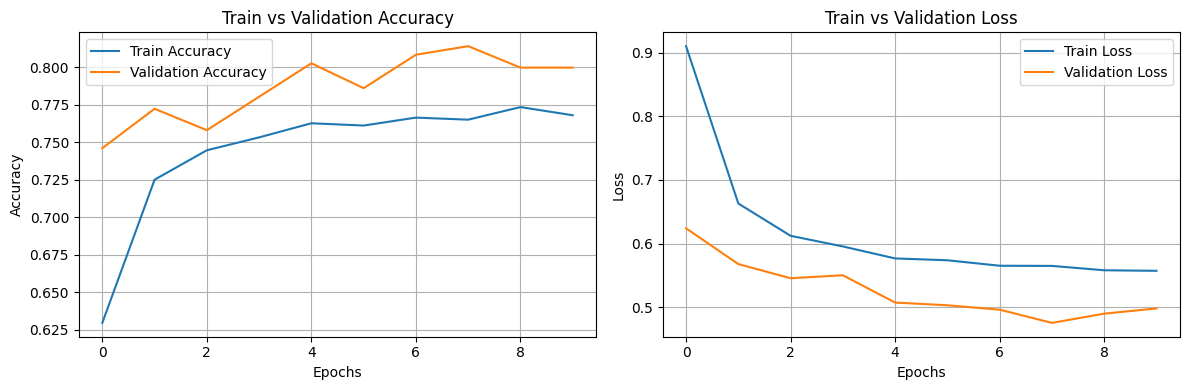

In [ ]:
epochs = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

# ⬇️⬇️⬇️ Add the plotting code directly here ⬇️⬇️⬇️
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# 1. Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)

# 2. Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from IPython.testing import test
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 695s 13s/step - accuracy: 0.8158 - loss: 0.4656
Test Loss: 0.48152345418930054
Test Accuracy: 0.8077144622802734


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Model predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes

# Class names (diseases)
class_names = list(test_data.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 335ms/step
Classification Report:
                     precision    recall  f1-score   support

           Covid-19       0.85      0.81      0.83       300
          Emphysema       0.79      0.82      0.81       250
             Normal       0.75      0.97      0.85       300
Pneumonia-Bacterial       0.72      0.68      0.70       300
    Pneumonia-Viral       0.74      0.57      0.64       300
       Tuberculosis       0.99      1.00      1.00       287

           accuracy                           0.81      1737
          macro avg       0.81      0.81      0.80      1737
       weighted avg       0.81      0.81      0.80      1737



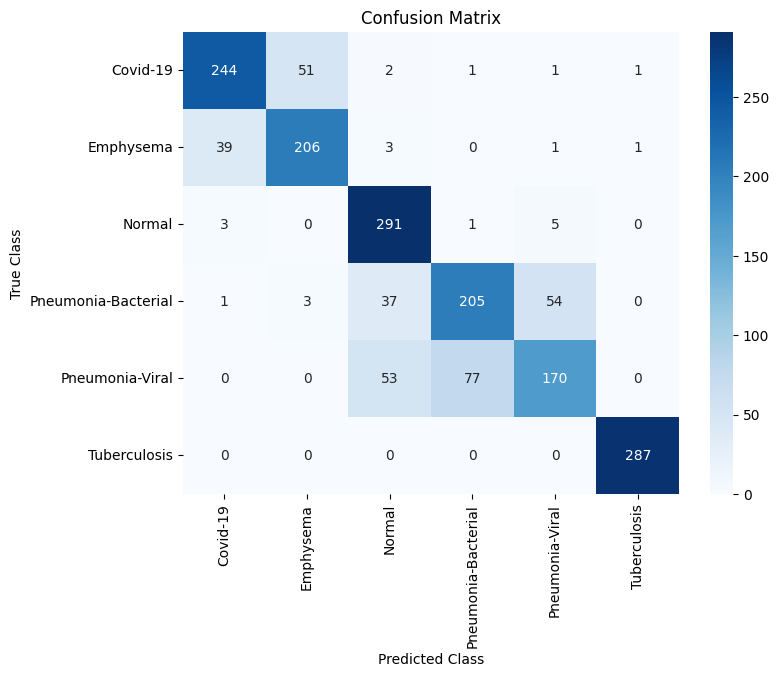

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data_aug = train_datagen_aug.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_data_aug = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_data_aug = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 14551 images belonging to 6 classes.
Found 1748 images belonging to 6 classes.
Found 1737 images belonging to 6 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 237s 521ms/step - accuracy: 0.7612 - loss: 0.5828 - val_accuracy: 0.7695 - val_loss: 0.5258
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 229s 503ms/step - accuracy: 0.7468 - loss: 0.5967 - val_accuracy: 0.7809 - val_loss: 0.5436
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 225s 495ms/step - accuracy: 0.7519 - loss: 0.5933 - val_accuracy: 0.7981 - val_loss: 0.4985
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 227s 499ms/step - accuracy: 0.7559 - loss: 0.5875 - val_accuracy: 0.7969 - val_loss: 0.5044
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 224s 492ms/step - accuracy: 0.7632 - loss: 0.5710 - val_accuracy: 0.7935 - val_loss: 0.5279
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 224s 492ms/step - accuracy: 0.7626 - loss: 0.5723 - val_accuracy: 0.8089 - val_loss: 0.4749
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 228s 501ms/step - accuracy: 0.7658 - loss: 0.5685 - val_accuracy: 0.7918 - val_loss: 0.4995
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 226s 496ms/step - accuracy: 0.7614 -

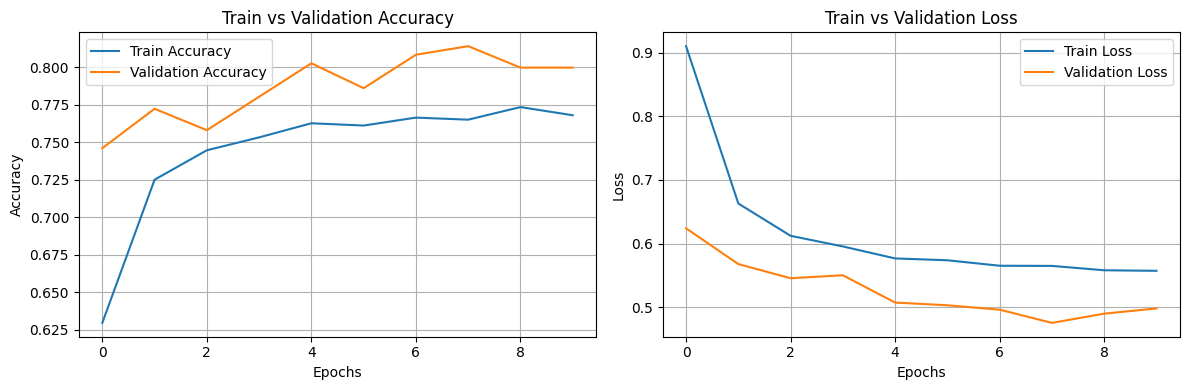

In [ ]:
epochs = 10

history_aug = model.fit(
    train_data_aug,
    validation_data=val_data_aug,
    epochs=epochs
)
# ⬇️⬇️⬇️ Add the plotting code directly here ⬇️⬇️⬇️
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# 1. Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)

# 2. Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
test_loss_aug, test_acc_aug = model.evaluate(test_data_aug)

print("Improved Test Accuracy:", test_acc_aug)

55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8241 - loss: 0.4310
Improved Test Accuracy: 0.8048359155654907


In [ ]:


# Model predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes

# Class names (diseases)
class_names = list(test_data.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step
Classification Report:
                     precision    recall  f1-score   support

           Covid-19       0.76      0.88      0.82       300
          Emphysema       0.84      0.70      0.76       250
             Normal       0.79      0.96      0.87       300
Pneumonia-Bacterial       0.70      0.75      0.72       300
    Pneumonia-Viral       0.78      0.54      0.64       300
       Tuberculosis       1.00      0.99      0.99       287

           accuracy                           0.80      1737
          macro avg       0.81      0.80      0.80      1737
       weighted avg       0.81      0.80      0.80      1737



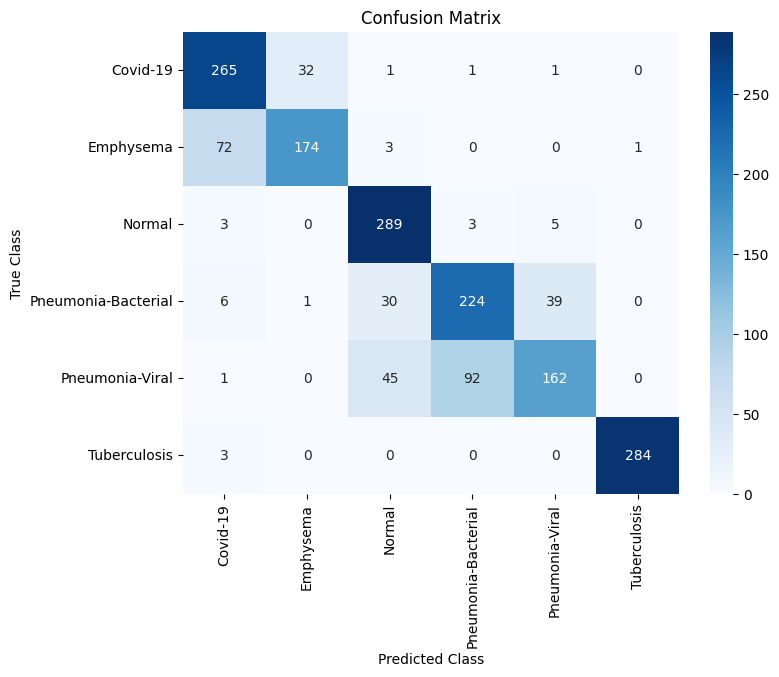

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

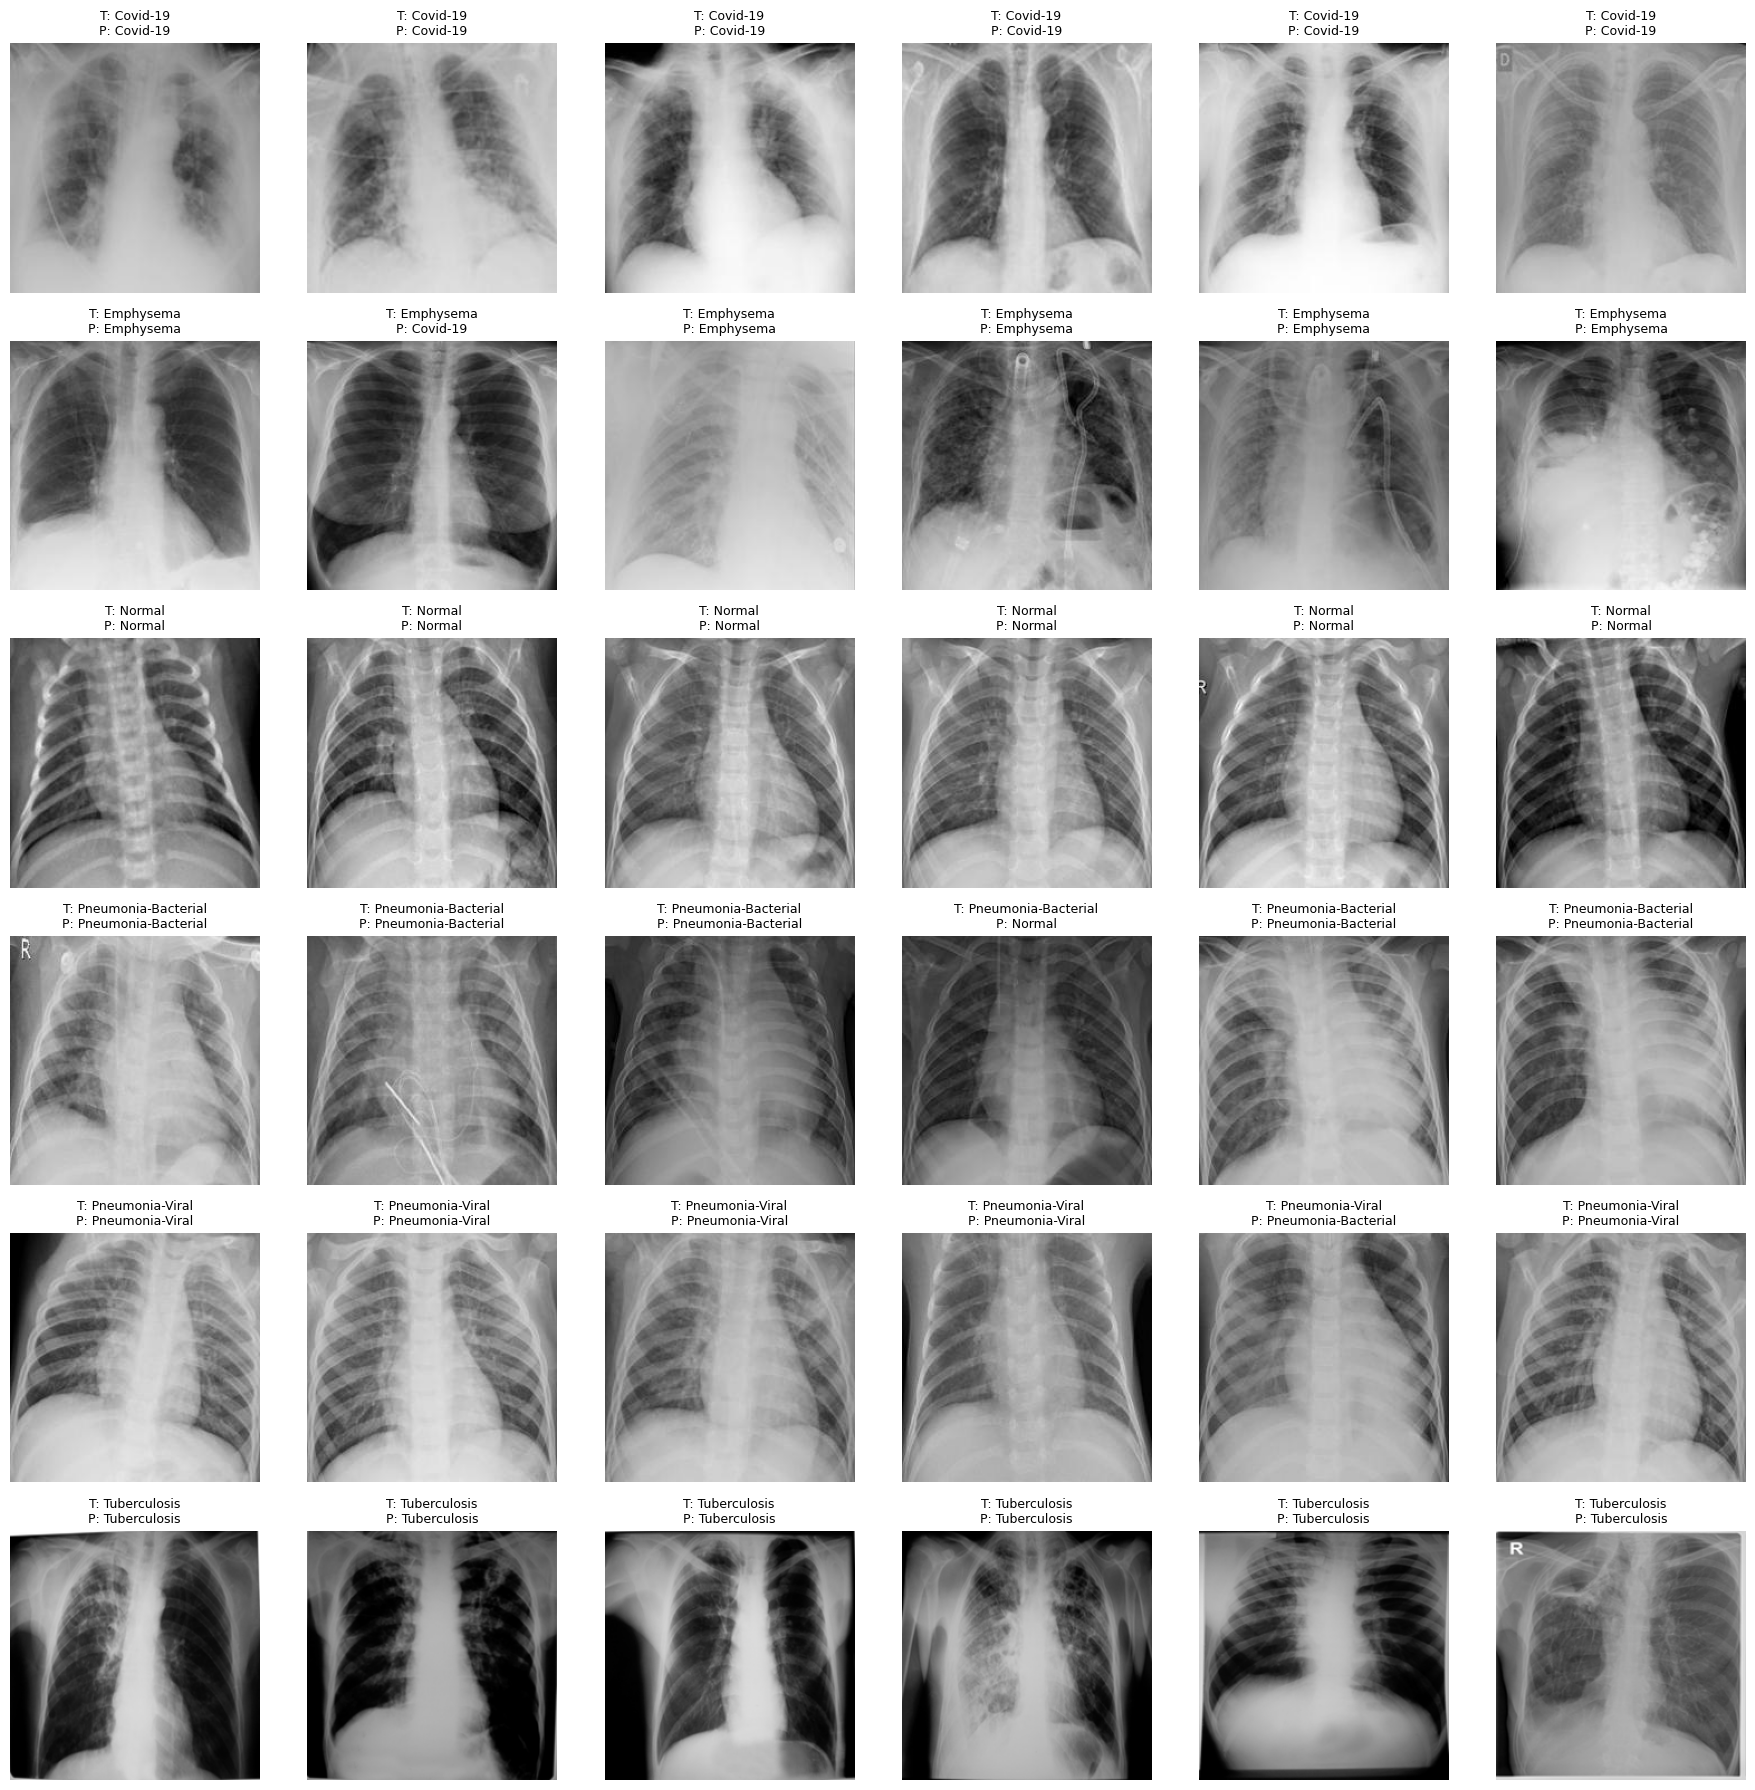

In [ ]:
# ===== Show 6 Images from EACH Class (Correct Way) =====

import numpy as np
import matplotlib.pyplot as plt

# Class names
class_names = list(test_data.class_indices.keys())
num_classes = len(class_names)
images_per_class = 6

# Storage arrays
collected_images = {i: [] for i in range(num_classes)}
collected_preds  = {i: [] for i in range(num_classes)}

# Iterate over test_data
for images, labels in test_data:
    predictions = model.predict(images)

    true_classes = np.argmax(labels, axis=1)
    pred_classes = np.argmax(predictions, axis=1)

    for i in range(len(images)):
        cls = true_classes[i]

        if len(collected_images[cls]) < images_per_class:
            collected_images[cls].append(images[i])
            collected_preds[cls].append(pred_classes[i])

    # Stop if we have 6 images per class
    if all(len(collected_images[c]) == images_per_class for c in range(num_classes)):
        break

# ===== Visualization =====
plt.figure(figsize=(18, num_classes * 3))

plot_index = 1
for cls in range(num_classes):
    for i in range(images_per_class):
        plt.subplot(num_classes, images_per_class, plot_index)
        plt.imshow(collected_images[cls][i])
        plt.axis("off")

        true_label = class_names[cls]
        pred_label = class_names[collected_preds[cls][i]]

        plt.title(f"T: {true_label}\nP: {pred_label}", fontsize=9)
        plot_index += 1

plt.tight_layout()
plt.show()


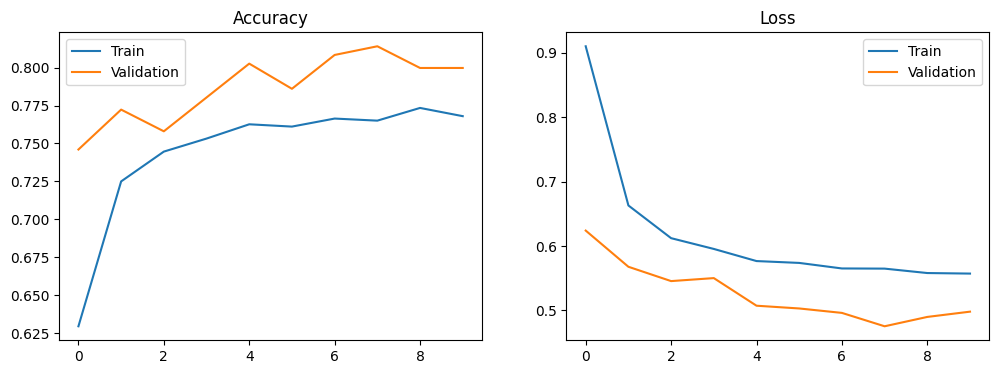

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

images, labels = next(iter(test_data))
predictions = model.predict(images)

true_classes = np.argmax(labels, axis=1)
predicted_classes = np.argmax(predictions, axis=1)

class_names = list(test_data.class_indices.keys())

plt.figure(figsize=(12,12))
idx = 1

for i in range(len(images)):
    if true_classes[i] != predicted_classes[i]:
        plt.subplot(3,3,idx)
        plt.imshow(images[i])
        plt.axis("off")

        plt.title(f"T: {class_names[true_classes[i]]}\nP: {class_names[predicted_classes[i]]}")
        idx += 1

    if idx > 9:
        break

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


<Figure size 1200x1200 with 0 Axes>

In [ ]:
from sklearn.metrics import recall_score

recall_per_class = recall_score(
    y_true,
    y_pred_classes,
    average=None
)

for i, cls in enumerate(class_names):
    print(f"Recall for {cls}: {recall_per_class[i]:.2f}")

Recall for Covid-19: 0.88
Recall for Emphysema: 0.70
Recall for Normal: 0.96
Recall for Pneumonia-Bacterial: 0.75
Recall for Pneumonia-Viral: 0.54
Recall for Tuberculosis: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


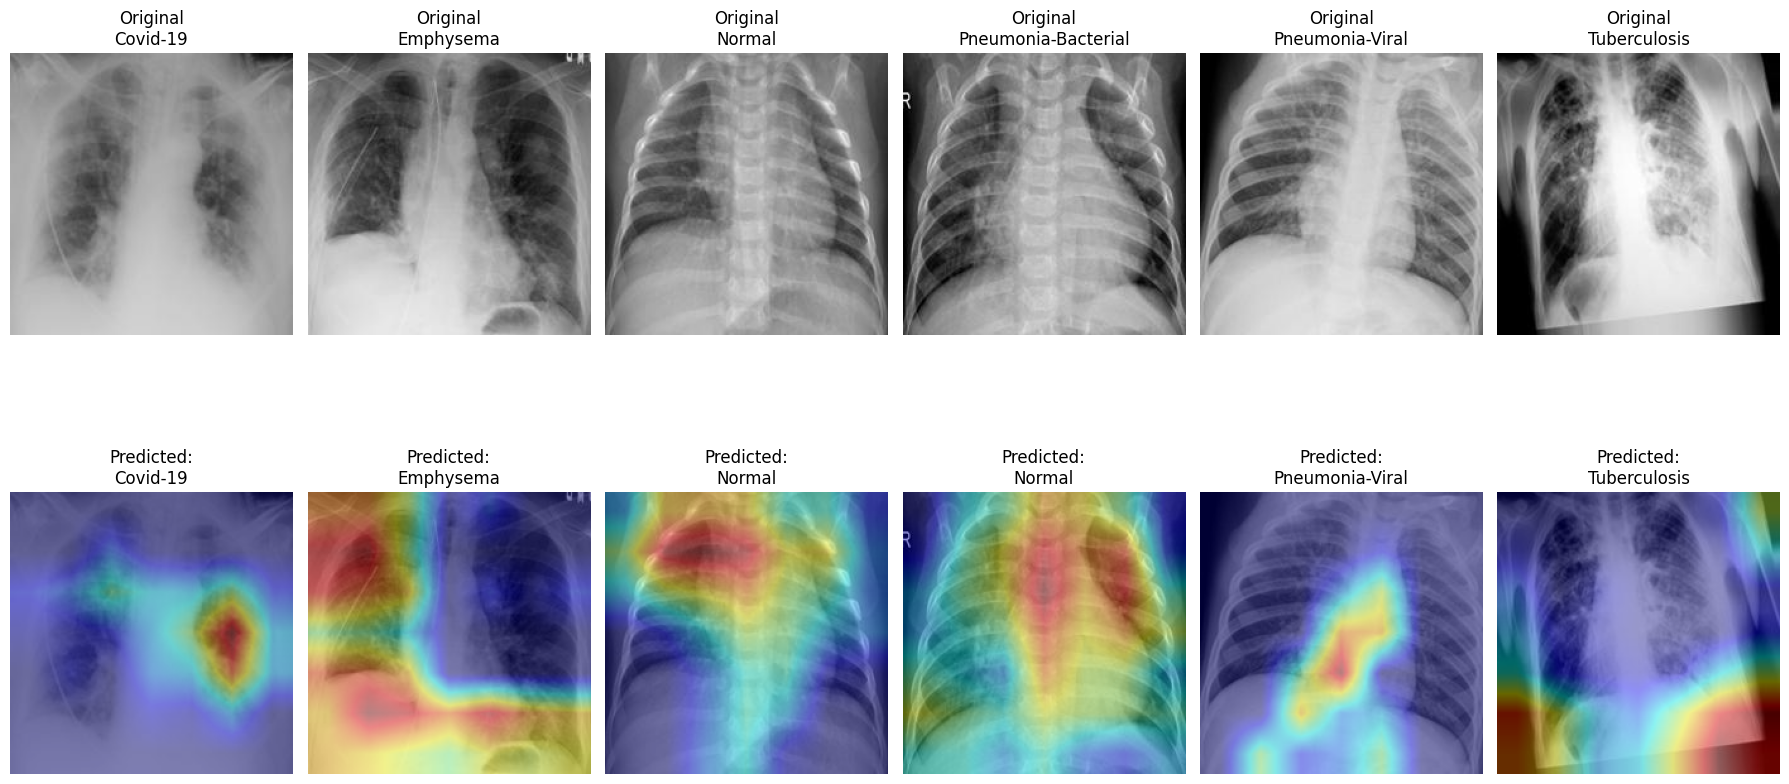

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os

# Class names
class_names = list(test_data.class_indices.keys())
test_dir = test_data.directory

# Last convolutional layer in DenseNet121
last_conv_layer_name = "conv5_block16_concat"

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        class_channel = predictions[:, class_idx]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

plt.figure(figsize=(18, 10))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_dir, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)

    # Load image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    preds = model.predict(img_array)
    predicted_class = class_names[np.argmax(preds)]

    # Grad-CAM
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (224, 224))

    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Original image
    plt.subplot(2, 6, i + 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original\n{class_name}")
    plt.axis("off")

    # Grad-CAM image
    plt.subplot(2, 6, i + 7)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted:\n{predicted_class}")
    plt.axis("off")

plt.tight_layout()
plt.show()


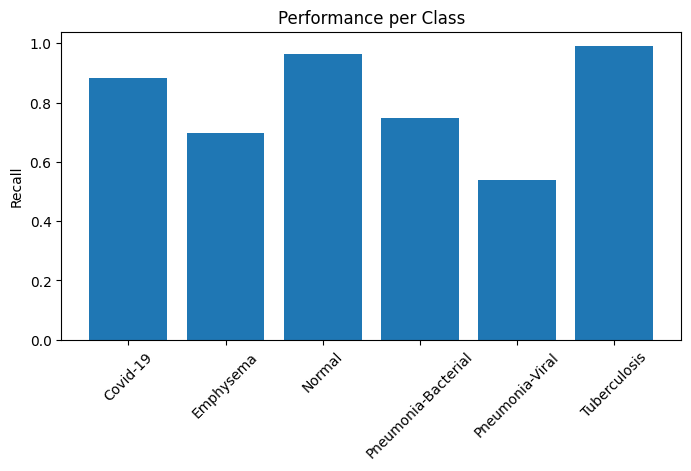

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names,
    output_dict=True
)

acc_per_class = [report[c]['recall'] for c in class_names]

plt.figure(figsize=(8,4))
plt.bar(class_names, acc_per_class)
plt.xticks(rotation=45)
plt.ylabel("Recall")
plt.title("Performance per Class")
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 339ms/step


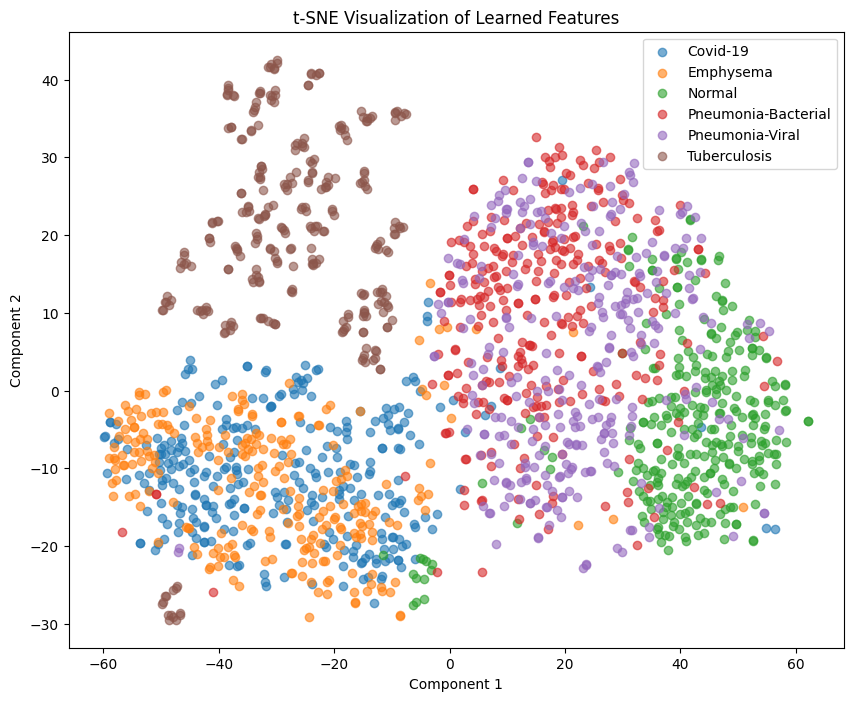

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model

# 1️⃣ Use the model without the last layer (feature extractor)
feature_model = Model(
    inputs=model.input,
    outputs=model.layers[-2].output  # before softmax
)

# 2️⃣ Extract features from the test set
features = feature_model.predict(test_data)
labels = test_data.classes
class_names = list(test_data.class_indices.keys())

# 3️⃣ Apply t-SNE (dimensionality reduction)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_2d = tsne.fit_transform(features)

# 4️⃣ Visualization
plt.figure(figsize=(10,8))

for i, class_name in enumerate(class_names):
    idx = labels == i
    plt.scatter(
        features_2d[idx, 0],
        features_2d[idx, 1],
        label=class_name,
        alpha=0.6
    )

plt.legend()
plt.title("t-SNE Visualization of Learned Features")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step


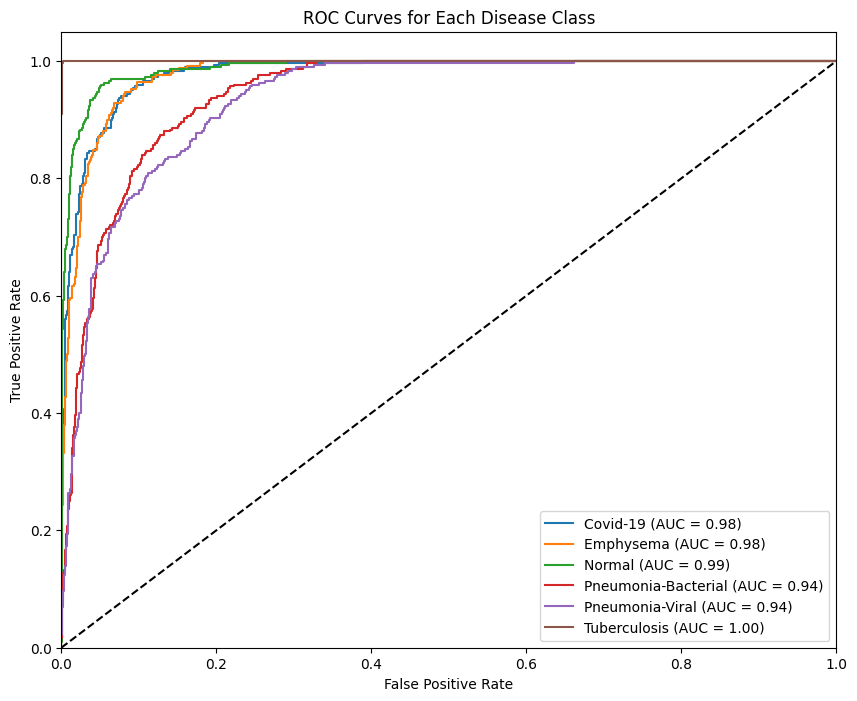

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Predictions
y_score = model.predict(test_data)
y_true = test_data.classes

# Class names
class_names = list(test_data.class_indices.keys())
num_classes = len(class_names)

# Convert y_true to one-hot
y_true_bin = label_binarize(y_true, classes=range(num_classes))

plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # random line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Disease Class")
plt.legend(loc="lower right")
plt.show()


55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step


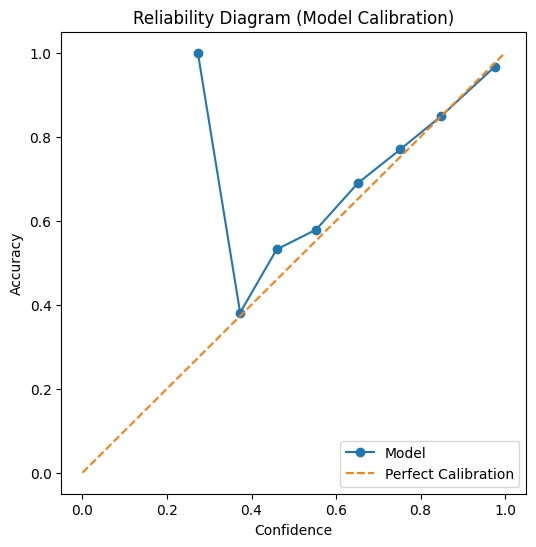

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model predictions
y_prob = model.predict(test_data)
y_true = test_data.classes

# Maximum confidence per image
confidence = np.max(y_prob, axis=1)
pred_class = np.argmax(y_prob, axis=1)

# Correct or incorrect
correct = (pred_class == y_true)

# Divide confidence into bins
bins = np.linspace(0, 1, 11)
bin_acc = []
bin_conf = []

for i in range(len(bins)-1):
    idx = (confidence >= bins[i]) & (confidence < bins[i+1])
    if np.sum(idx) > 0:
        bin_acc.append(np.mean(correct[idx]))
        bin_conf.append(np.mean(confidence[idx]))

# Plot
plt.figure(figsize=(6,6))
plt.plot(bin_conf, bin_acc, marker='o', label='Model')
plt.plot([0,1], [0,1], '--', label='Perfect Calibration')
plt.xlabel("Confidence")
plt.ylabel("Accuracy")
plt.title("Reliability Diagram (Model Calibration)")
plt.legend()
plt.show()


55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step


Disease   TP  FP   FN    TN  Precision  Recall (Sensitivity)  \
0             Covid-19  265  85   35  1352   0.757143              0.883333   
1            Emphysema  174  33   76  1454   0.840580              0.696000   
2               Normal  289  79   11  1358   0.785326              0.963333   
3  Pneumonia-Bacterial  224  96   76  1341   0.700000              0.746667   
4      Pneumonia-Viral  162  45  138  1392   0.782609              0.540000   
5         Tuberculosis  284   1    3  1449   0.996491              0.989547   

   Specificity  F1-score  
0     0.940849  0.815385  
1     0.977808  0.761488  
2     0.945024  0.865269  
3     0.933194  0.722581  
4     0.968685  0.639053  
5     0.999310  0.993007

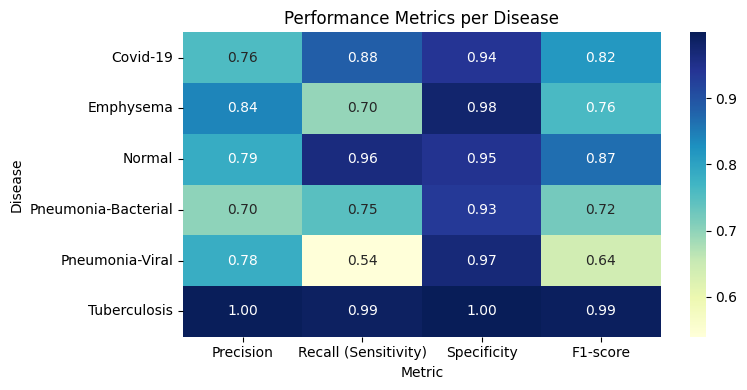

In [ ]:
# ===== Complete Performance Analysis: Table + Metrics + Heatmap =====

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_prob = model.predict(test_data)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_data.classes

class_names = list(test_data.class_indices.keys())
num_classes = len(class_names)

rows = []

for i, class_name in enumerate(class_names):
    TP = np.sum((y_pred == i) & (y_true == i))
    FP = np.sum((y_pred == i) & (y_true != i))
    FN = np.sum((y_pred != i) & (y_true == i))
    TN = np.sum((y_pred != i) & (y_true != i))

    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)          # Sensitivity
    specificity = TN / (TN + FP + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    rows.append({
        "Disease": class_name,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN,
        "Precision": precision,
        "Recall (Sensitivity)": recall,
        "Specificity": specificity,
        "F1-score": f1
    })

# Create DataFrame
metrics_df = pd.DataFrame(rows)

# Show table
display(metrics_df)

# ===== Heatmap Visualization =====
plt.figure(figsize=(8,4))

sns.heatmap(
    metrics_df.set_index("Disease")[[
        "Precision",
        "Recall (Sensitivity)",
        "Specificity",
        "F1-score"
    ]],
    annot=True,
    cmap="YlGnBu",
    fmt=".2f"
)

plt.title("Performance Metrics per Disease")
plt.ylabel("Disease")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()